In [1]:
## What you see below is the weekly/monthly/daily S2 data which missing data has been 

In [2]:
import pandas as pd
import numpy as np 
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

In [3]:
S1 = pd.read_csv("S1_new.csv")
S2 = pd.read_csv("S2_new.csv")
S3 = pd.read_csv("S3_new.csv")
S1 = S1.drop(columns=["Unnamed: 0"])
S2 = S2.drop(columns=["Unnamed: 0"])
S3 = S3.drop(columns=["Unnamed: 0"])
#S1.replace(0, np.nan, inplace=True)
#S2.replace(0, np.nan, inplace=True)
#S3.replace(0, np.nan, inplace=True)
print("number of duplicate rows in sensor 1",S1.duplicated().sum())
print("number of duplicate rows in sensor 2",S2.duplicated().sum())
print("number of duplicate rows in sensor 3",S3.duplicated().sum())
S1 = pd.DataFrame.drop_duplicates(S1).reset_index()
S2 = pd.DataFrame.drop_duplicates(S2).reset_index()
S3 = pd.DataFrame.drop_duplicates(S3).reset_index()

number of duplicate rows in sensor 1 0
number of duplicate rows in sensor 2 0
number of duplicate rows in sensor 3 0


In [4]:
S2_avg = S2.copy()
S2_avg["month"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.month
S2_avg["year"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.year
S2_month = S2_avg.groupby(['year','month'],as_index=False).mean()      
S2_month.head()


,year,month,level_0,index,countlineId,Pedestrian
0,2021,5,44.5,134.5,22995.0,1914.133333
1,2021,6,179.5,539.5,22995.0,2030.344444
2,2021,7,362.5,1088.5,22995.0,1942.768817
3,2021,8,548.5,1646.5,22995.0,1975.774194
4,2021,9,731.5,2195.5,22995.0,1978.900000


In [5]:
S2_avg = S2.copy()
S2_avg["month"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.month
S2_avg["year"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.year
S2_avg["day"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.day
S2_day = S2_avg.groupby(['year','month','day'],as_index=False).mean()
S2_day = S2_day[(np.abs(stats.zscore(S2_day["Pedestrian"])) < 3)]
S2_day.head()

,year,month,day,level_0,index,countlineId,Pedestrian
0,2021,5,17,2.5,8.5,22995.0,1867.666667
1,2021,5,18,8.5,26.5,22995.0,1925.166667
2,2021,5,19,14.5,44.5,22995.0,2071.833333
3,2021,5,20,20.5,62.5,22995.0,1119.833333
4,2021,5,21,26.5,80.5,22995.0,1712.666667


In [6]:
S2_avg = S2.copy()
S2_avg["month"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.month
S2_avg["year"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.year
S2_avg["week"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.week
S2_week = S2_avg.groupby(['year','month','week'],as_index=False).mean()
S2_week = S2_week[(np.abs(stats.zscore(S2_week["Pedestrian"])) < 3)]
S2_week.head()

/var/folders/w_/ft1536ls3k3gvb2sks5dbg8h0000gn/T/ipykernel_86728/2287105339.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  S2_avg["week"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.week


,year,month,week,level_0,index,countlineId,Pedestrian
0,2021,5,20,20.5,62.5,22995.0,1813.833333
1,2021,5,21,62.5,188.5,22995.0,1973.690476
2,2021,5,22,86.5,260.5,22995.0,2199.333333
3,2021,6,22,107.5,323.5,22995.0,2108.416667
4,2021,6,23,146.5,440.5,22995.0,2013.285714


In [7]:
def OLS(S1,S2,S3):
    train_S2=S2.loc[S2["Pedestrian"]!=0]
    train_S1=S1.loc[S2["Pedestrian"]!=0]
    train_S3=S3.loc[S2["Pedestrian"]!=0]
    train = {"S1":np.array(train_S1["Pedestrian"]),
           "S3":np.array(train_S3["Pedestrian"])}
    train = pd.DataFrame(train)
    test_S2=S2.loc[S2["Pedestrian"]==0]
    test_S1=S1.loc[S2["Pedestrian"]==0]
    test_S3=S3.loc[S2["Pedestrian"]==0]
    test = {"S1":np.array(test_S1["Pedestrian"]),
           "S3":np.array(test_S3["Pedestrian"])}
    test = pd.DataFrame(test)

    constant = sm.add_constant(train)
    model = sm.OLS(list(train_S2["Pedestrian"]),constant)
    result = model.fit()
    new_constant=sm.add_constant(test)
    pred = result.predict(new_constant)
    return pred
def month(S2):
    S2_avg = S2.copy()
    S2_avg["month"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.month
    S2_avg["year"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.year
    S2_month = S2_avg.groupby(['year','month'],as_index=False).mean()
    return S2_month
def week(S2):
    S2_avg = S2.copy()
    S2_avg["month"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.month
    S2_avg["year"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.year
    S2_avg["week"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.week
    S2_week = S2_avg.groupby(['year','month','week'],as_index=False).mean()
    return S2_week
def day(S2):
    S2_avg = S2.copy()
    S2_avg["month"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.month
    S2_avg["year"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.year
    S2_avg["day"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.day
    S2_day = S2_avg.groupby(['year','month','day'],as_index=False).mean()
    return S2_day
def miss_value(S2,pred):
    miss_value = S2.loc[S2["Pedestrian"]==0]
    pred.index = miss_value.index
    miss_value = S2.loc[S2["Pedestrian"]==0]
    for i in range(len(S2)):
        if S2["Pedestrian"][i]==0:
            S2["Pedestrian"][i]= pred[i]
    return S2

### OLS Monthly S2

/var/folders/w_/ft1536ls3k3gvb2sks5dbg8h0000gn/T/ipykernel_86728/1546264049.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S2["Pedestrian"][i]= pred[i]


,year,month,level_0,index,countlineId,Pedestrian
0,2021,5,44.5,134.5,22995.0,1914.133333
1,2021,6,179.5,539.5,22995.0,2030.344444
2,2021,7,362.5,1088.5,22995.0,1942.768817
3,2021,8,548.5,1646.5,22995.0,1975.774194
4,2021,9,731.5,2195.5,22995.0,1978.900000
5,2021,10,914.5,2744.5,22995.0,1964.247312
6,2021,11,1097.5,3293.5,22995.0,1820.900000
7,2021,12,1280.5,3842.5,22995.0,1848.094843
8,2022,1,1466.5,4400.5,22995.0,2159.954786
9,2022,2,1643.5,4931.5,22995.0,2228.433640


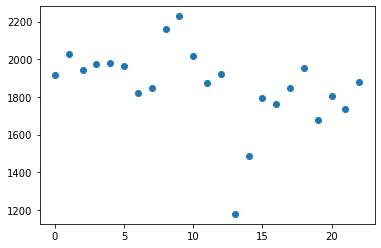

In [8]:
S1_month = month(S1)
S3_month = month(S3)
p = OLS(S1_month,S2_month,S3_month)
new_S2month = miss_value(S2_month,p)
new_S2month = new_S2month[(np.abs(stats.zscore(new_S2month["Pedestrian"])) < 3)]
plt.scatter(np.arange(len(new_S2month)),new_S2month["Pedestrian"])
new_S2month

### OLS Weekly S2

/var/folders/w_/ft1536ls3k3gvb2sks5dbg8h0000gn/T/ipykernel_86728/1546264049.py:31: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  S2_avg["week"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.week
/var/folders/w_/ft1536ls3k3gvb2sks5dbg8h0000gn/T/ipykernel_86728/1546264049.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S2["Pedestrian"][i]= pred[i]


,year,month,week,level_0,index,countlineId,Pedestrian
0,2021,5,20,20.5,62.5,22995.0,1813.833333
1,2021,5,21,62.5,188.5,22995.0,1973.690476
2,2021,5,22,86.5,260.5,22995.0,2199.333333
3,2021,6,22,107.5,323.5,22995.0,2108.416667
4,2021,6,23,146.5,440.5,22995.0,2013.285714


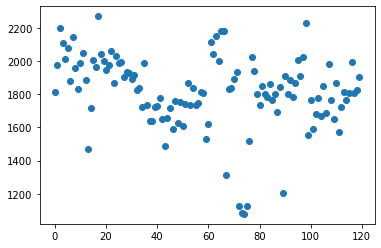

In [9]:
S1_week = week(S1)
S3_week = week(S3)
p = OLS(S1_week,S2_week,S3_week)
new_S2week = miss_value(S2_week,p)
new_S2week = new_S2week[(np.abs(stats.zscore(new_S2week["Pedestrian"])) < 3)]
plt.scatter(np.arange(len(new_S2week)),new_S2week["Pedestrian"])
new_S2week.head()

### OLS Daily S2

/var/folders/w_/ft1536ls3k3gvb2sks5dbg8h0000gn/T/ipykernel_86728/1546264049.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S2["Pedestrian"][i]= pred[i]


,year,month,day,level_0,index,countlineId,Pedestrian
0,2021,5,17,2.5,8.5,22995.0,1867.666667
1,2021,5,18,8.5,26.5,22995.0,1925.166667
2,2021,5,19,14.5,44.5,22995.0,2071.833333
3,2021,5,20,20.5,62.5,22995.0,1119.833333
4,2021,5,21,26.5,80.5,22995.0,1712.666667


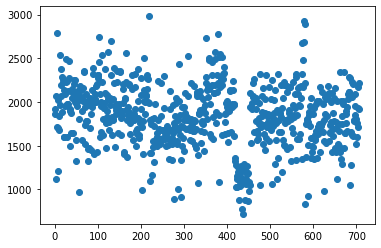

In [10]:
S1_day = day(S1)
S3_day = day(S3)
p = OLS(S1_day,S2_day,S3_day)
new_S2day = miss_value(S2_day,p)
new_S2day = new_S2day[(np.abs(stats.zscore(new_S2day["Pedestrian"])) < 3)]
plt.scatter(np.arange(len(new_S2day)),new_S2day["Pedestrian"])
new_S2day.head()

### OLS S2 (whole data)

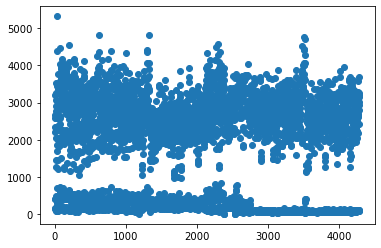

In [19]:
p = OLS(S1,S2,S3)
new_S2 = miss_value(S2,p)
new_S2 = new_S2[(np.abs(stats.zscore(new_S2["Pedestrian"])) < 3)]
plt.scatter(np.arange(len(new_S2)),new_S2["Pedestrian"])


In [12]:
a = S2.loc[pd.to_datetime(S2["UTC Datetime"])>=pd.to_datetime("1/1/2022")]
footfall = pd.read_excel("Footfall_DLR_Daily.xlsx")
footfall = pd.DataFrame.drop_duplicates(footfall).reset_index()
footfall.loc[footfall["Sensor Number"]=="S2"]=S2

In [13]:
#footfall['UTC Datetime'] = footfall["UTC Datetime"].dt.strftime("%m/%d/%Y")
footfall['Local Datetime'] = footfall["Local Datetime"].dt.strftime("%m/%d/%Y %H:%M:%S")

In [14]:
footfall.to_csv("Footfall_without_missing_data.csv")

In [27]:
train_S2 = S2_day.loc[S2_day["year"]!=2023]
#train_S2 = train_S2.drop(["level_0",'index'],axis=1)
S1_day1 = S1_day.loc[S1_day["year"]!=2023]
S3_day1 = S3_day.loc[S3_day["year"]!=2023] 
train = {"S1":np.array(S1_day1["Pedestrian"]),
         "S3":np.array(S3_day1["Pedestrian"])
    
}
train = pd.DataFrame(train)

test_S2 = new_S2day.loc[new_S2day["year"]==2023]
test_S2 = test_S2.drop(["level_0",'index'],axis=1)
S1_day_ = S1_day.loc[S1_day["year"]==2023]
S3_day_ = S3_day.loc[S3_day["year"]==2023] 
test = {"S1":np.array(S1_day_["Pedestrian"]),
         "S3":np.array(S3_day_["Pedestrian"])
    
}
test = pd.DataFrame(test)

constant = sm.add_constant(train)
model = sm.OLS(np.array(train_S2["Pedestrian"]),constant)
result = model.fit()
new_constant=sm.add_constant(train)
pred = result.predict(new_constant)

### Monthly S2 OLS prediction (1/1/2023-4/1/2023)

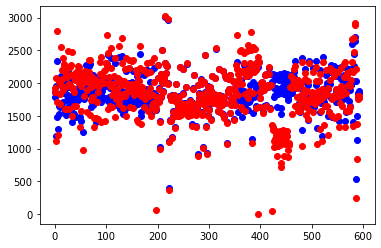

In [31]:
plt.scatter(np.arange(len(pred)),pred,color="b")
plt.scatter(np.arange(len(train_S2["Pedestrian"])),train_S2["Pedestrian"],color="r")

In [18]:

pred.index = np.arange(102,123)
S = []
for i in range(len(S2_week)):
    if S2_week["year"][i]==2023:
            S.append(pred[i])
    else:
        S.append(S2_week['Pedestrian'][i])
        
    
w = {"year":S2_week["year"],
     #"month":S2_week["month"],
     "week":S2_week["week"],
    "real data": S2_week["Pedestrian"],
    "data with prediction for 2023":S}
w = pd.DataFrame(w)
w.to_csv("weekly_S2.csv")

In [ ]:
a = pd.read_csv("daily_S2.csv")
a

In [ ]:
a_2023 = a.loc[a["year"]==2023]
Jan = a_2023.loc[a_2023["month"]==1]
Feb = a_2023.loc[a_2023["month"]==2]
Mar = a_2023.loc[a_2023["month"]==3]
Apr = a_2023.loc[a_2023["month"]==4]

In [ ]:
#print(January February March April)
print("2023")
print("January")
print("real : ",sum(Jan["real data"]))
print("OLS prediction : ",sum(Jan["data with prediction for 2023"]))
print("February")
print("real : ",sum(Feb["real data"]))
print("OLS prediction : ",sum(Feb["data with prediction for 2023"]))
print("March")
print("real : ",sum(Mar["real data"]))
print("OLS prediction : ",sum(Mar["data with prediction for 2023"]))
print("April")
print("real : ",sum(Apr["real data"]))
print("OLS prediction : ",sum(Apr["data with prediction for 2023"]))

### This is the comparison of the sum of  average daily data for each month in 2023 between real and predicted data